# Comparing clustering across blobs

### How differently do major clustering approaches vary when it comes to blobs' relative locations?

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
%matplotlib inline
sns.set_style('dark')

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import AffinityPropagation, SpectralClustering, MeanShift, estimate_bandwidth, KMeans
from sklearn import metrics

# The coordinates of the centers of our blobs for the first run.
centers = [[0, 3], [-3, -3], [3, -3]]

'''Modified code from challenges and cycled into a few functions below. Courtesy of Thinkful.'''

# Function to designate 10,000 rows worth of data with two features representing input
# number of clusters, each having a standard deviation of 1. Uses sklearn make_blob.
def blobber(centers):    
    global X_train
    X, y = make_blobs(
        n_samples=10000,
        centers=centers,
        cluster_std=1,
        n_features=2,
        random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
    fit, ax = plt.subplots(figsize=(16, 9))
    ax.title.set_text('Population scatterplot')
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()
    
# Function to plot the clustering algorithm results on ten percent of data.
def plot_clusters(X_train, n_clusters=3):
    fig, axes = plt.subplots(2, 2, figsize=(16, 9))
    
    # Meanshift first.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
    clu_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    clu_shift.fit(X_train)
    axes[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=clu_shift.labels_)
    axes[0, 0].title.set_text('Meanshift')
    
    # Spectral next.
    clu_spec = SpectralClustering(n_clusters=n_clusters)
    clu_spec.fit(X_train)
    axes[0, 1].scatter(X_train[:, 0], X_train[:, 1], c=clu_spec.labels_)
    axes[0, 1].title.set_text('Spectral clustering')
    
    # KMeans.
    clu_km = KMeans(n_clusters=n_clusters)
    clu_km.fit(X_train)
    axes[1, 0].scatter(X_train[:, 0], X_train[:, 1], c=clu_km.labels_)
    axes[1, 0].title.set_text('KMeans')
    
    # Affinity.
    clu_afp = AffinityPropagation().fit(X_train)
    axes[1, 1].title.set_text('Affinity propagation')
    for k, color in zip(range(len(clu_afp.cluster_centers_indices_)), cycle('bgrcmykw')):
        members = clu_afp.labels_ == k
        axes[1, 1].plot(X_train[members, 0], X_train[members, 1], color + '.')
        axes[1, 1].plot(X_train[clu_afp.cluster_centers_indices_[k]][0], 
                        X_train[clu_afp.cluster_centers_indices_[k]][1], 
                        'o', markerfacecolor=color, markeredgecolor='k')
        for X in X_train[members]:
            axes[1, 1].plot([X_train[clu_afp.cluster_centers_indices_[k]][0], X[0]], 
                            [X_train[clu_afp.cluster_centers_indices_[k]][1], X[1]], color)

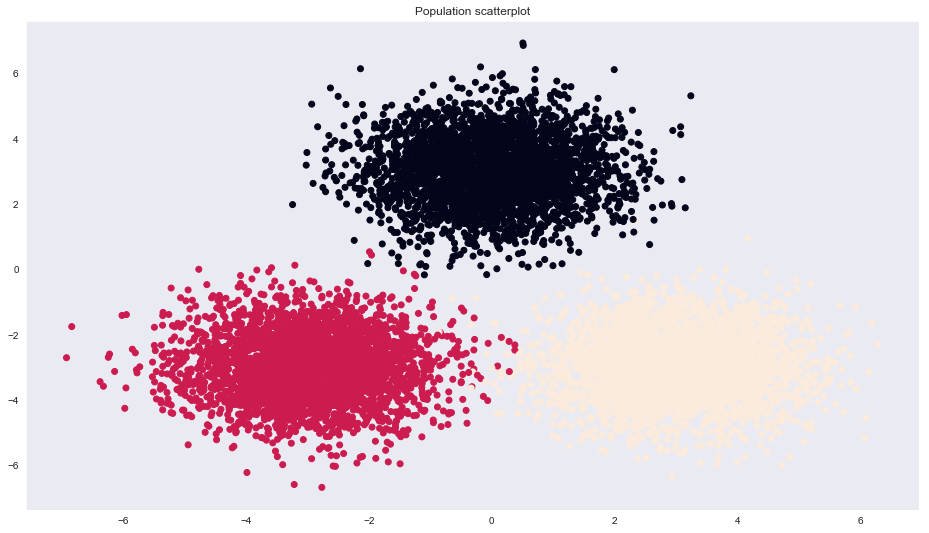

In [2]:
blobber(centers)

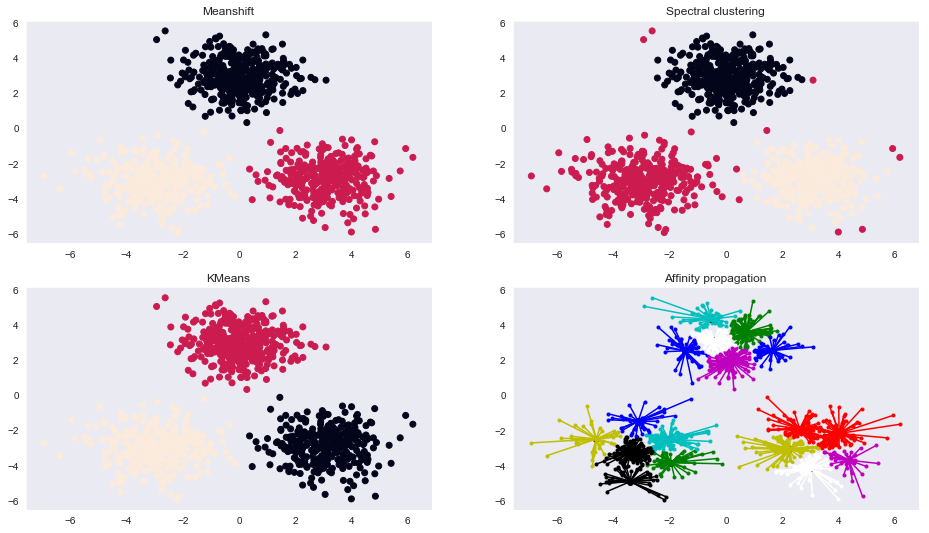

In [3]:
plot_clusters(X_train)

### Even 3-way spread

Nothing too crazy here, as shown across the exercise. Spectral clustering is grouping someoutside of the white and black zones, for some reason.

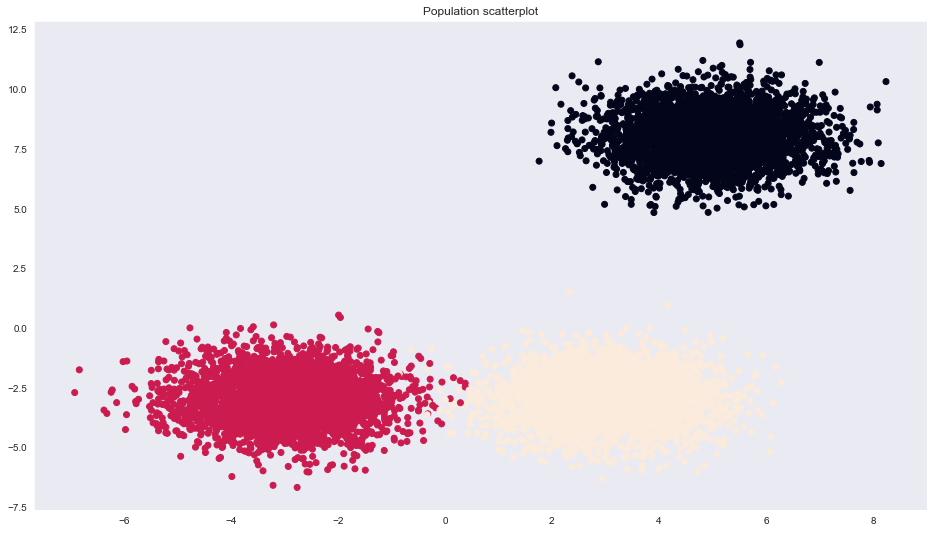

In [4]:
blobber([[5, 8], [-3, -3], [3, -3]])

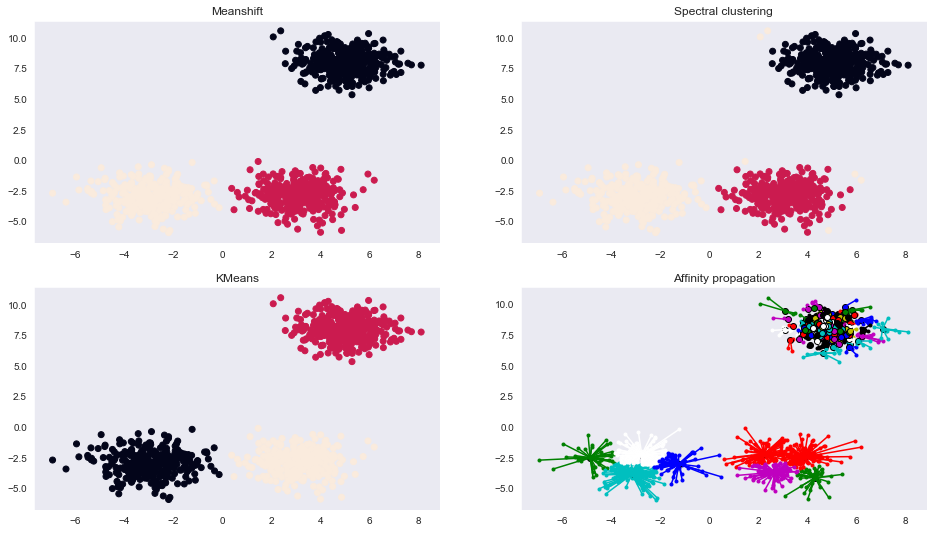

In [5]:
plot_clusters(X_train)

### Mostly what we expected!

The spectral clustering method is doing a few strange things with some of the points, as it did before.

We are seeing the number of clusters really blow up within the asymmetrically-selected cluster for the propagation. This is interesting when compared to the larger sub-clusters of the other two clusters - they don't seem to behave this way; is it due to their proximity?

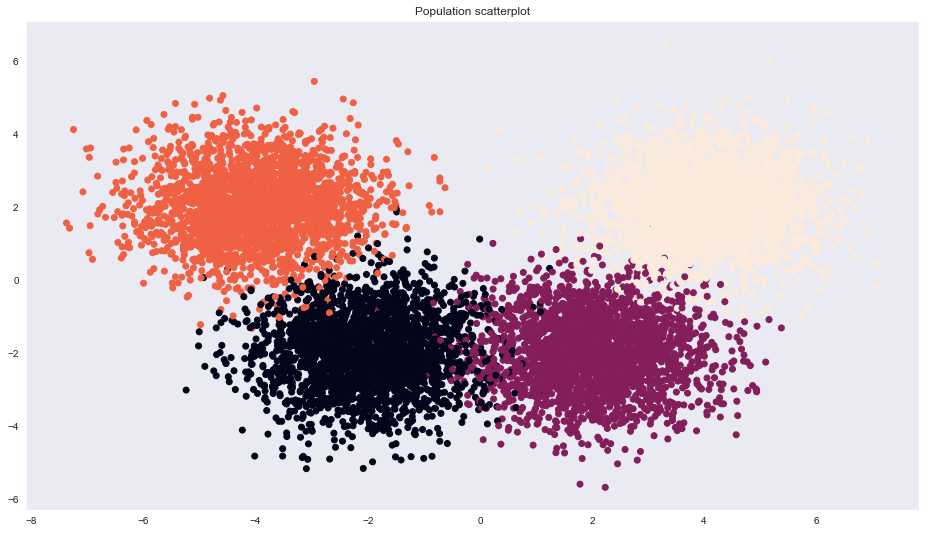

In [6]:
blobber([[-2, -2], [2, -2], [-4, 2], [4, 2]])

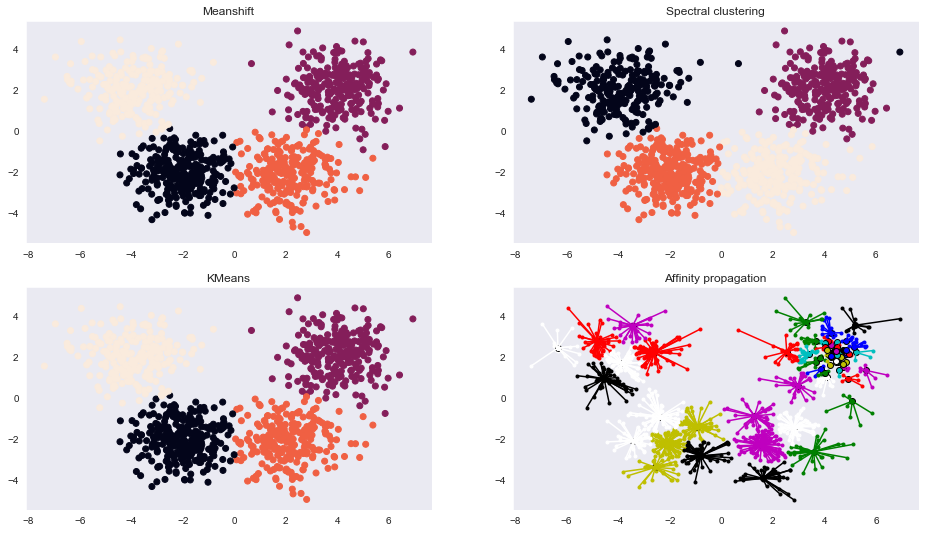

In [7]:
plot_clusters(X_train, 4)

### Similar behavior

Here the clusters look to be doing a fair job of grouping, but the propagation is still creating tons of smaller, sub-clusters within one larger cluster.

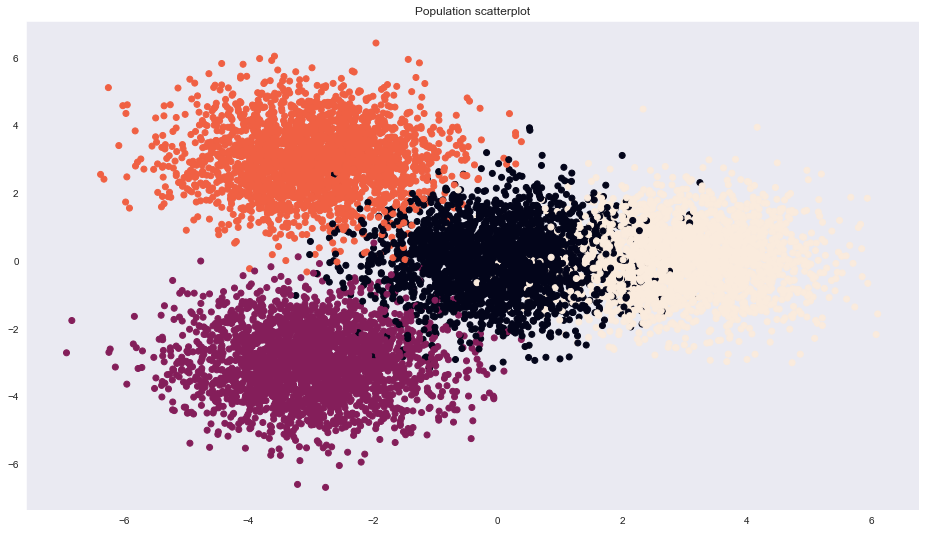

In [8]:
blobber([[0, 0], [-3, -3], [-3, 3], [3, 0]])

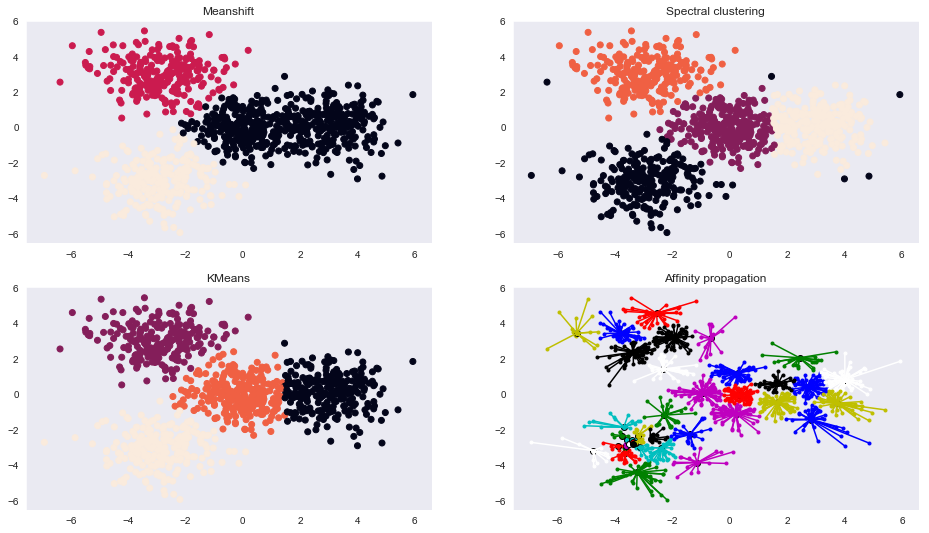

In [9]:
plot_clusters(X_train, 4)

### A few differences with this layout

It looks like meanshift is really struggling to make some separations along the x axis. The others seem to behave mostly the same way. A few odd ones on spectral clustering, and quite good separation with kmeans. Our propagation clustering is pulling back some on the amount of clusters it designates.